# Import dependences

In [1]:
import re
import random
# import PyQt5

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

# Load Data

In [2]:
data_path = 'data/fpt_1d_20180816_20240816.csv'
df = pd.read_csv(data_path)
df.head()

,Date,Adj Close,Open,High,Low,Close,Volume
0,2018-08-16,18233.41,18581.98,18625.29,18387.06,18625.29,3182706
1,2018-08-17,18445.43,18711.92,18841.87,18625.29,18841.87,2142576
2,2018-08-20,18530.24,18841.87,19188.38,18690.27,18928.50,2205416
3,2018-08-21,18530.24,18885.18,18971.81,18798.55,18928.50,1979951
4,2018-08-22,18678.65,18950.15,19188.38,18928.50,19080.10,3312563


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Analyze data

## 1. What was the change in price of the stock overtime?

In [4]:
df.describe()

,Adj Close,Open,High,Low,Close,Volume
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,50419.079167,51223.279627,51803.399100,50690.609527,51253.886080,3.746741e+06
std,27873.166448,27970.306711,28307.869503,27649.006786,27982.491888,2.609337e+06
min,17300.540000,17325.860000,17888.950000,17325.860000,17672.370000,2.922720e+05
25%,25639.990000,26205.360000,26443.590000,25965.040000,26191.060000,1.872506e+06
50%,54314.685000,55545.055000,56194.075000,54480.150000,55482.045000,3.123012e+06
75%,62873.642500,64272.210000,64877.120000,63686.202500,64224.952500,4.836474e+06
max,139600.000000,139100.000000,139700.000000,137500.000000,139600.000000,1.927216e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2018-08-16 to 2024-08-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1500 non-null   float64
 1   Open       1500 non-null   float64
 2   High       1500 non-null   float64
 3   Low        1500 non-null   float64
 4   Close      1500 non-null   float64
 5   Volume     1500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.0 KB


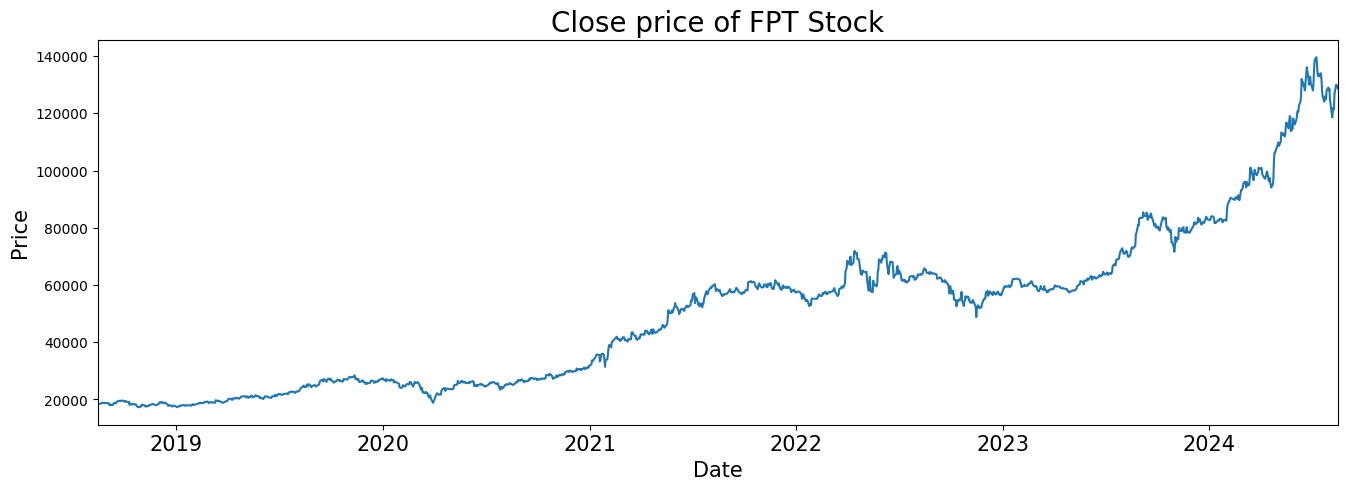

In [6]:
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 5))

# Creating a plot
plt.plot(df.index, df['Adj Close'])

# Adding a plot title and customizing its font size
plt.title('Close price of FPT Stock', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=0, fontsize=15)

plt.xlim(df.index.min(), df.index.max())

plt.show()

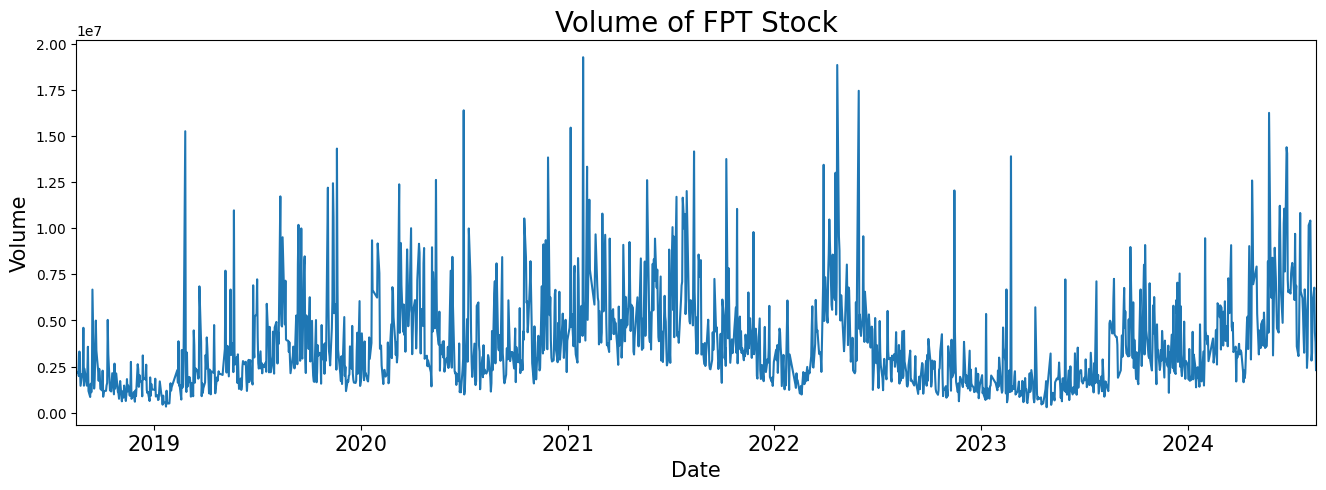

In [7]:
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 5))

# Creating a plot
plt.plot(df.index, df['Volume'])

# Adding a plot title and customizing its font size
plt.title('Volume of FPT Stock', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=0, fontsize=15)

plt.xlim(df.index.min(), df.index.max())

plt.show()

## 2. What was the moving average of the various stocks?

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()

Text(0.5, 1.0, 'FPT Corporation')

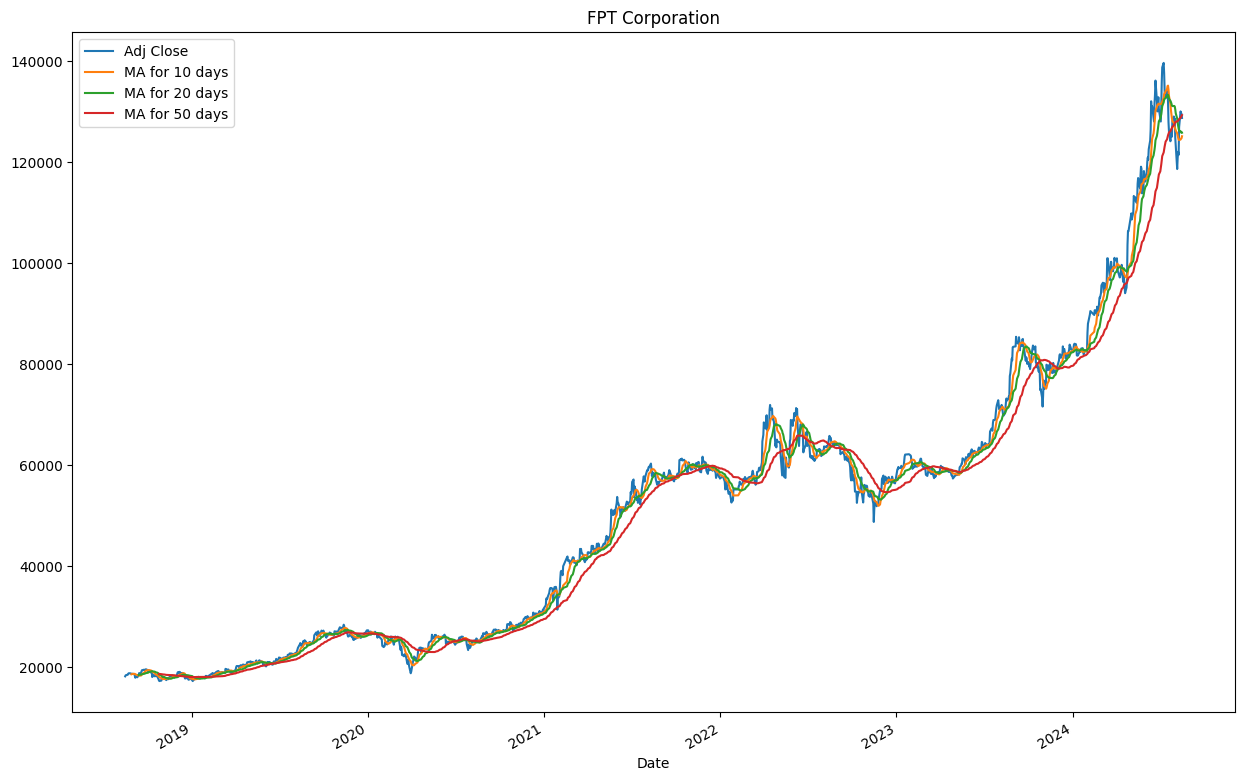

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)

df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
ax.set_title('FPT Corporation')

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

Text(0.5, 1.0, 'FPT Corporation')

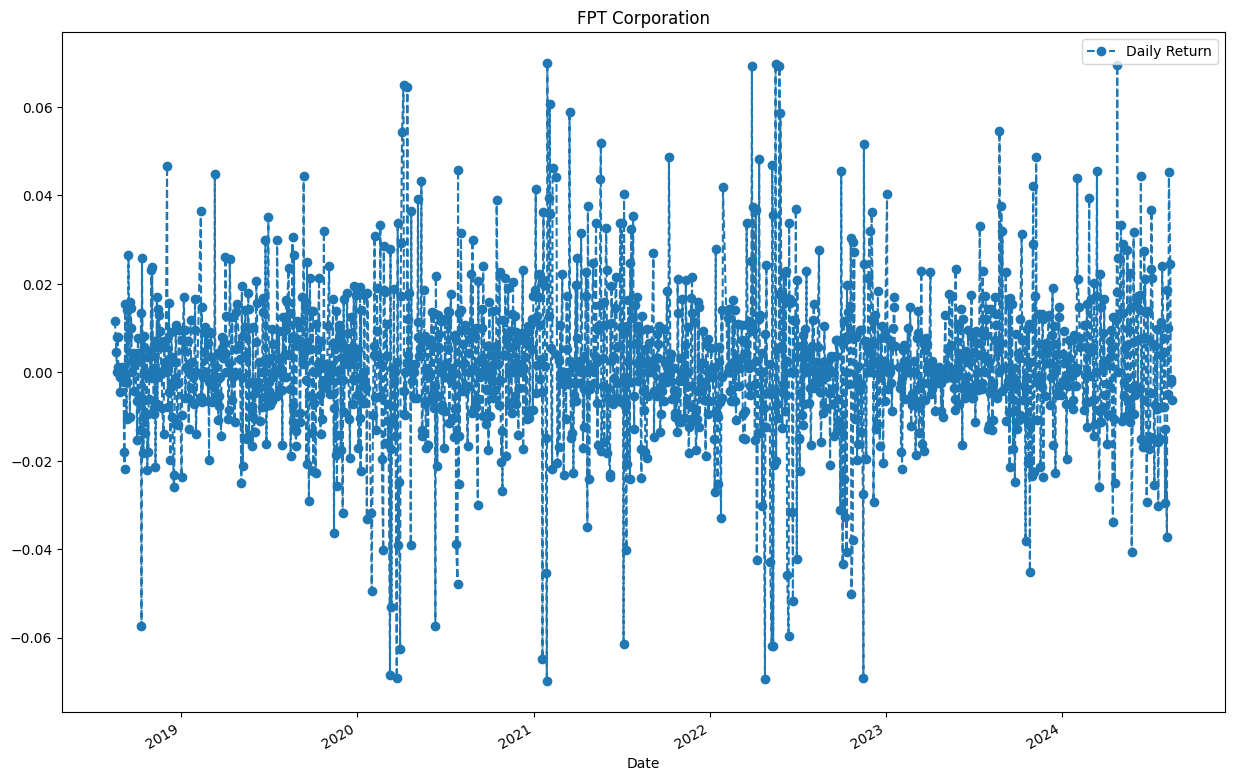

In [10]:
df['Daily Return'] = df['Adj Close'].pct_change()

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)

df['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
ax.set_title('FPT Corporation')

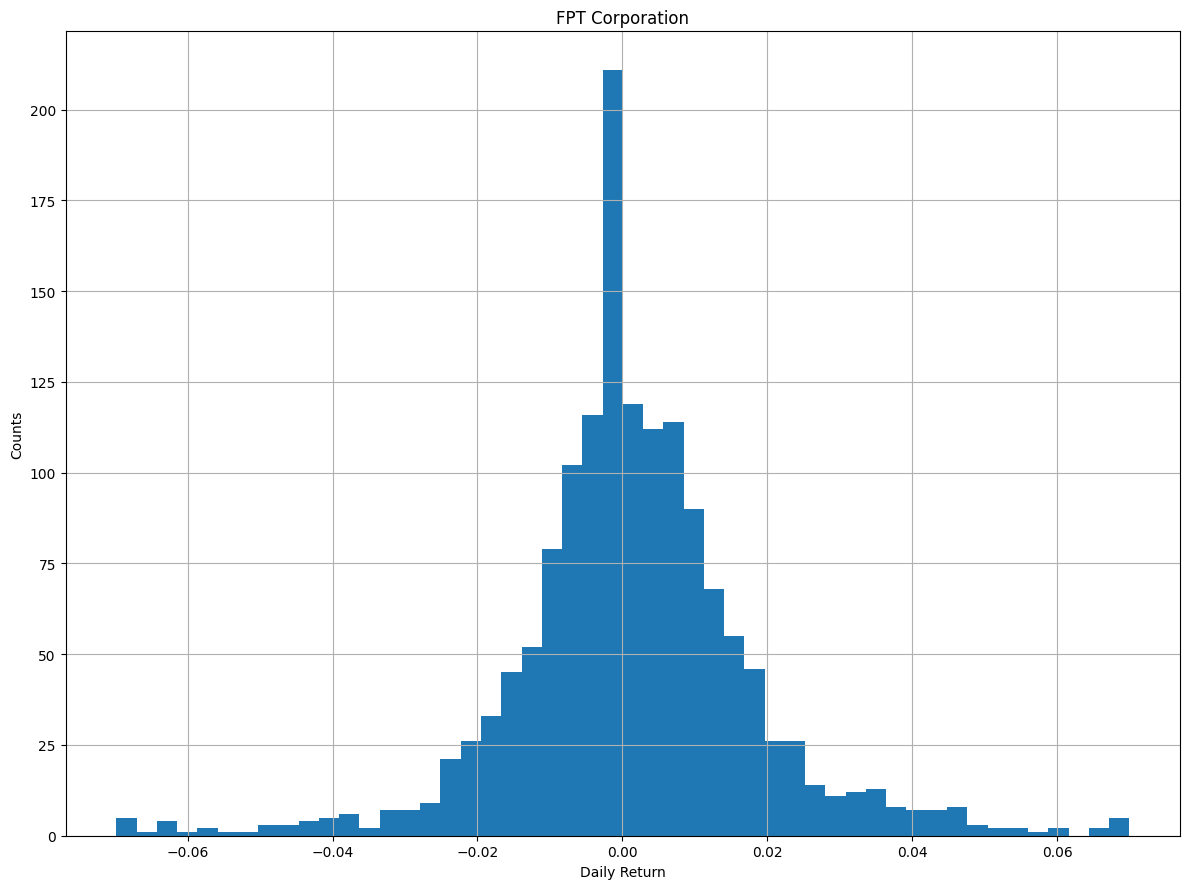

In [11]:
plt.figure(figsize=(12, 9))

df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('FPT Corporation')
    
plt.tight_layout()

## 4. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

Text(50, 50, 'FPT')

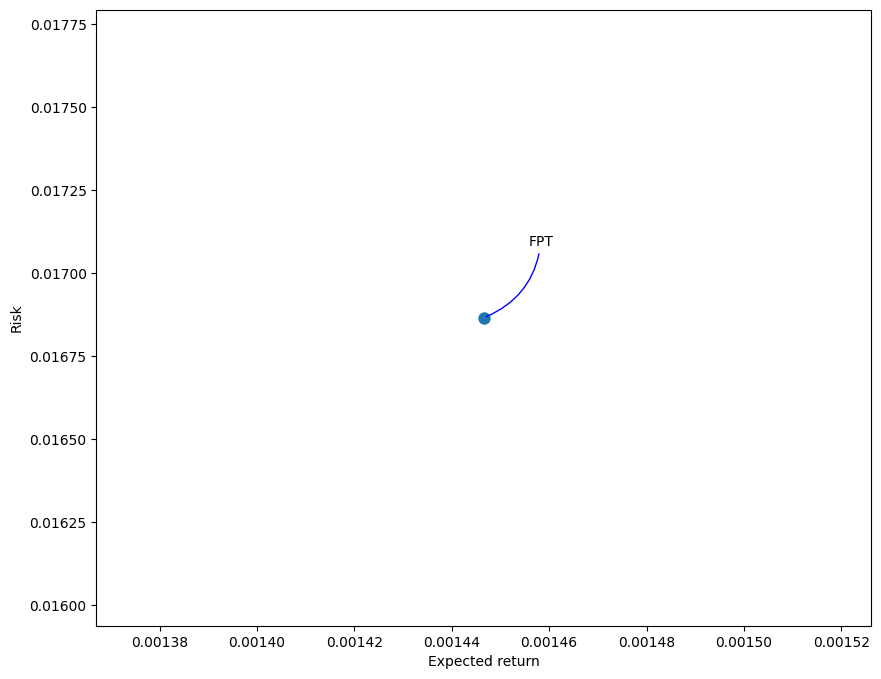

In [12]:
df['Daily Return'].dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(df['Daily Return'].mean(), df['Daily Return'].std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

plt.annotate('FPT', xy=(df['Daily Return'].mean(), df['Daily Return'].std()), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


# Forecast data

## Preprocess data

In [13]:
# Create a new dataframe with only the 'Close column
closed_price_df = df.filter(['Close'])
data = closed_price_df.values

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

## Split data into train and test set

In [15]:
# Get the number of rows to train the model on
train_percent = 0.95
time_step = 60

In [16]:
train_size = int(len(scaled_data) * train_percent)

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size-time_step:, :]

train_data.shape, test_data.shape

((1425, 1), (135, 1))

In [17]:
# Split the data into x_train and y_train data sets
X_train = []
y_train = []
for i in range(time_step, len(train_data)):
    X_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((1365, 60), (1365,))

In [18]:
# Create the data sets x_test and y_test
X_valid = []
y_valid = []
for i in range(60, len(test_data)):
    X_valid.append(test_data[i-60:i, 0])
    y_valid.append(test_data[i, 0])
    
# Convert the data to a numpy array
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

X_valid.shape, y_valid.shape

((75, 60), (75,))

## Linear Regression

### Train

In [19]:
from sklearn.linear_model import LinearRegression

# Tạo model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

LinearRegression()

### Evaluate

In [35]:
# Get the models predicted price values 
predictions = model.predict(X_valid)
predictions = scaler.inverse_transform([predictions])

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_valid) ** 2)))
rmse

125212.31481946251

/var/folders/t6/86wyndb17fgdq0_j3t6qbkwh0000gn/T/ipykernel_95560/1932649850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[0]


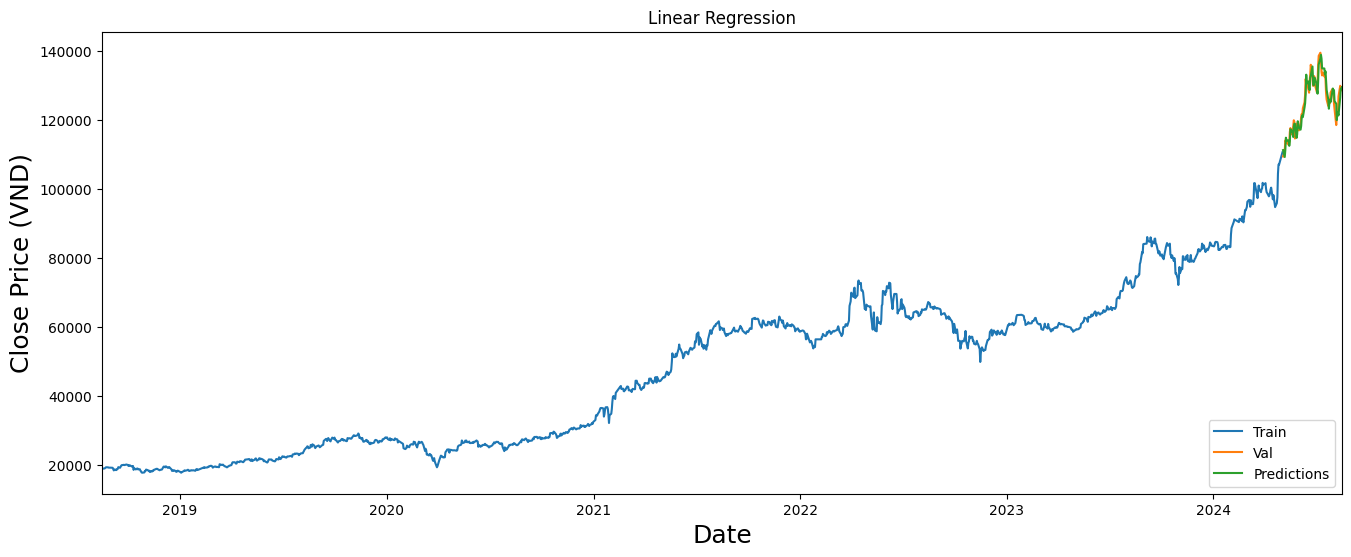

In [82]:
# Plot the data
train = closed_price_df[:train_size]
valid = closed_price_df[train_size:]
valid['Predictions'] = predictions[0]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xlim(df.index.min(), df.index.max())
plt.show()

/var/folders/t6/86wyndb17fgdq0_j3t6qbkwh0000gn/T/ipykernel_95560/23142071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[0]


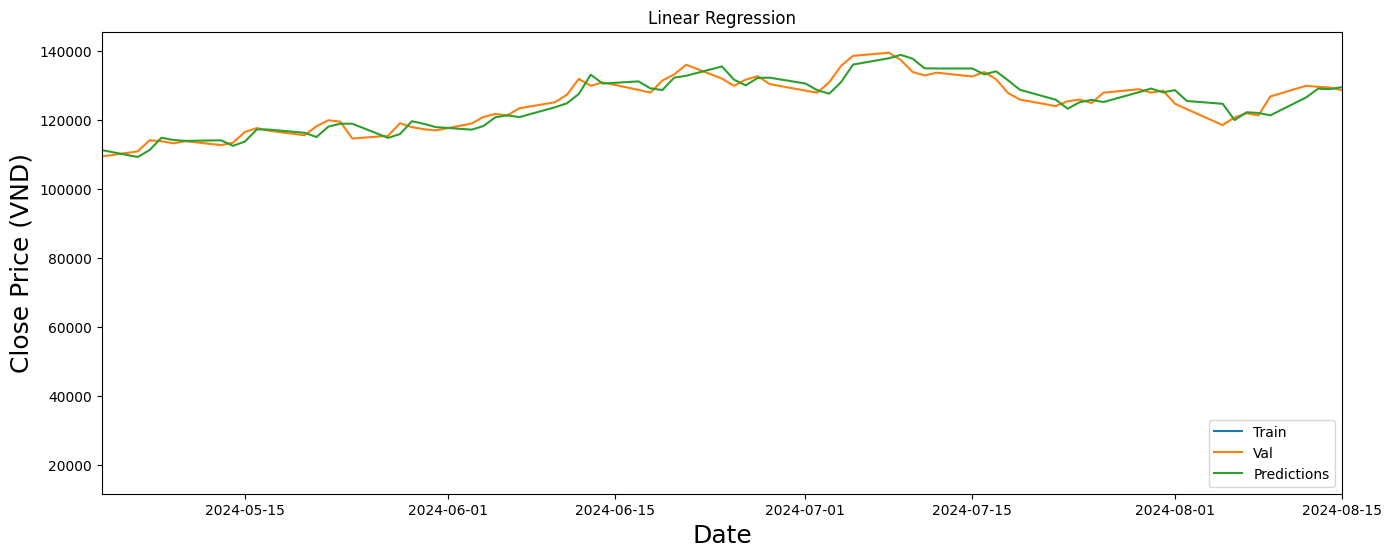

In [83]:
# Plot the data
train = closed_price_df[:train_size]
valid = closed_price_df[train_size:]
valid['Predictions'] = predictions[0]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xlim(valid.index.min(), valid.index.max())
plt.show()

### Forecast

In [84]:
from datetime import timedelta

latest_row = X_valid[-1]
latest_time = closed_price_df.iloc[-1].name

number_of_days = 60

future_time_list = []
for day in range(number_of_days):
    future_time_list.append(latest_time + timedelta(days=day))

# future_time_list

In [85]:
prices_of_60_days_ago = X_valid[-1]
future_prices = []
for i in tqdm(range(number_of_days)):
    pred = model.predict([prices_of_60_days_ago])
    prices_of_60_days_ago = np.append(prices_of_60_days_ago[1:], pred)
    result = scaler.inverse_transform([pred])
    future_prices.append(result[0][0])

100%|██████████| 60/60 [00:00<00:00, 4073.59it/s]


In [86]:
test = pd.DataFrame(future_prices, index=future_time_list, columns=['Close'])

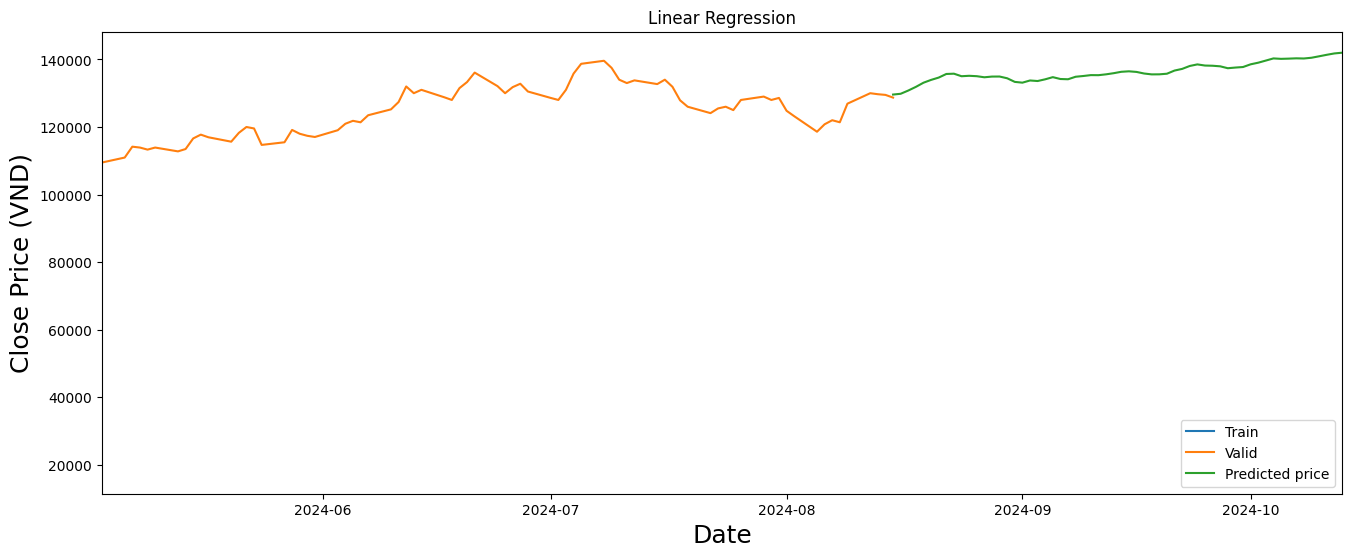

In [87]:
# Plot the data
train = df.filter(['Close'])[:train_size]
valid = df.filter(['Close'])[train_size:]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Valid')
plt.plot(test['Close'], label='Predicted price')
plt.legend(loc='lower right')
plt.xlim(valid.index.min(), test.index.max())
plt.show()

## LSTM

### Train

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=2, epochs=20)

Epoch 1/20
683/683 [==============================] - 16s 20ms/step - loss: 0.0012
Epoch 2/20
683/683 [==============================] - 13s 19ms/step - loss: 3.8948e-04
Epoch 3/20
683/683 [==============================] - 13s 19ms/step - loss: 2.9936e-04
Epoch 4/20
683/683 [==============================] - 13s 19ms/step - loss: 2.9923e-04
Epoch 5/20
683/683 [==============================] - 13s 19ms/step - loss: 2.0777e-04
Epoch 6/20
683/683 [==============================] - 13s 19ms/step - loss: 1.9905e-04
Epoch 7/20
683/683 [==============================] - 13s 19ms/step - loss: 2.0356e-04
Epoch 8/20
683/683 [==============================] - 13s 19ms/step - loss: 1.8627e-04
Epoch 9/20
683/683 [==============================] - 13s 19ms/step - loss: 1.3509e-04
Epoch 10/20
683/683 [==============================] - 13s 19ms/step - loss: 1.3732e-04
Epoch 11/20
683/683 [==============================] - 14s 21ms/step - loss: 1.2163e-04
Epoch 12/20
683/683 [========================

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate

In [41]:
# Get the models predicted price values 
predictions = model.predict(X_valid)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_valid) ** 2)))
rmse

3/3 [==============================] - 1s 36ms/step


124546.91195264996

/var/folders/t6/86wyndb17fgdq0_j3t6qbkwh0000gn/T/ipykernel_4845/1574325648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


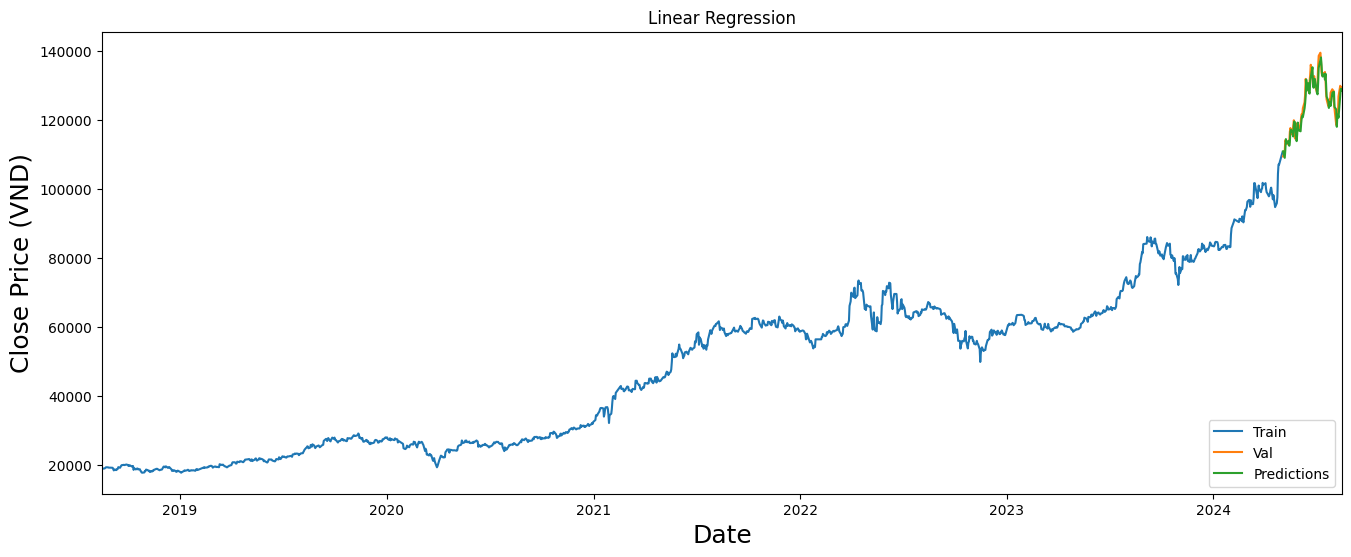

In [42]:
# Plot the data
train = closed_price_df[:train_size]
valid = closed_price_df[train_size:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xlim(train.index.min(), valid.index.max())
plt.show()

/var/folders/t6/86wyndb17fgdq0_j3t6qbkwh0000gn/T/ipykernel_4845/1060610491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


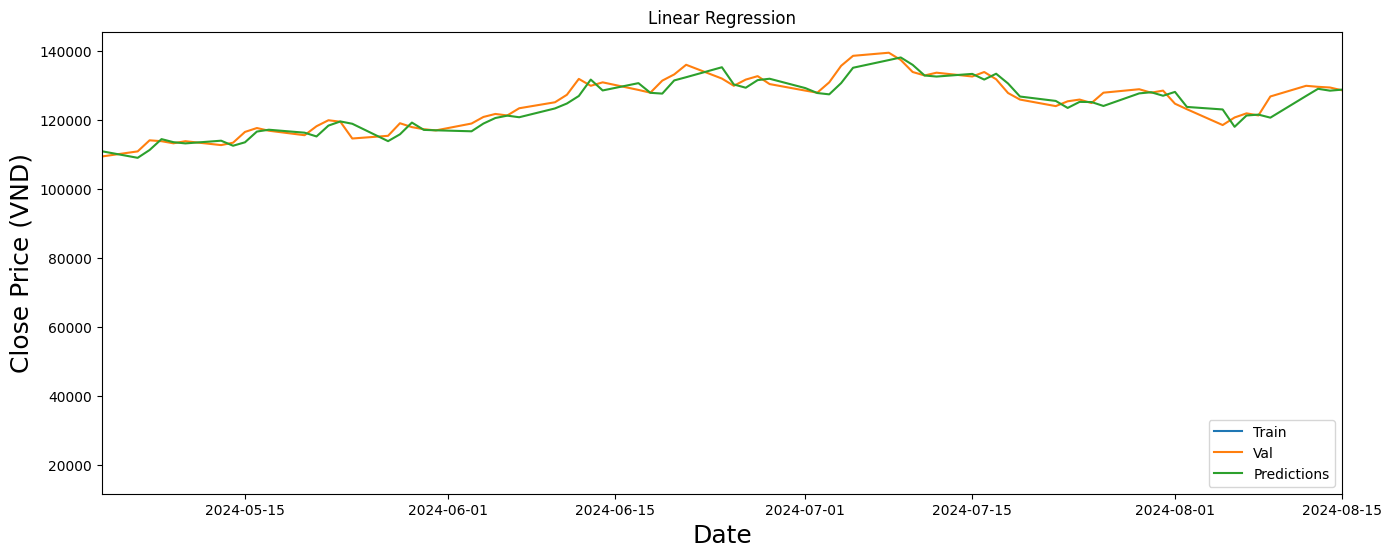

In [43]:
# Plot the data
train = closed_price_df[:train_size]
valid = closed_price_df[train_size:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xlim(valid.index.min(), valid.index.max())
plt.show()

### Forecast

In [52]:
from datetime import timedelta

latest_row = X_valid[-1]
latest_time = closed_price_df.iloc[-1].name

number_of_days = 60

future_time_list = []
for day in range(number_of_days):
    future_time_list.append(latest_time + timedelta(days=day))

# future_time_list

In [53]:
prices_of_60_days_ago = X_valid[-1]
future_prices = []
for i in tqdm(range(number_of_days)):
    pred = model.predict(prices_of_60_days_ago.reshape(1, -1), verbose=0)
    prices_of_60_days_ago = np.append(prices_of_60_days_ago[1:], pred)
    result = scaler.inverse_transform(pred)
    future_prices.append(result[0][0])

100%|██████████| 60/60 [00:02<00:00, 20.33it/s]


In [54]:
test = pd.DataFrame(future_prices, index=future_time_list, columns=['Close'])

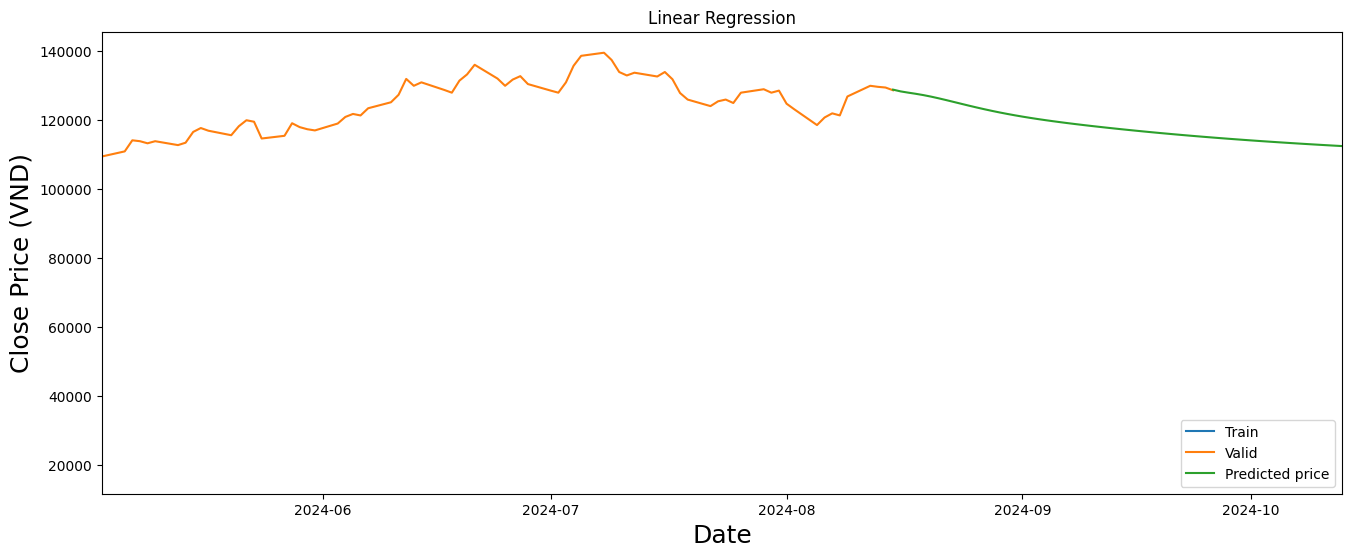

In [55]:
# Plot the data
train = df.filter(['Close'])[:train_size]
valid = df.filter(['Close'])[train_size:]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Valid')
plt.plot(test['Close'], label='Predicted price')
plt.legend(loc='lower right')
plt.xlim(valid.index.min(), test.index.max())
plt.show()

In [ ]:
exit()